# Caipora Project


__Objecitve__

Explore data generated by _data_preparation.ipynb_.

 
__Data Source__

__${WORKDIR}__/data/ouptut/hotspot_spi.csv


In [1]:
import os
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Constants

In [2]:
WORKDIR = os.path.abspath(os.getcwd())

YEARS_AVAILABLE = [2014, 2018, 2021]

## Get the data

__Load into Pandas DataFrame__

In [3]:
file = ''.join([WORKDIR, "/data/output/hotspot_spi.csv"]) 
dataset = pd.read_csv(file)

dataset.head()

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,riscofogocat,IPS Amazônia,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
0,2014,ACRE,ACRELANDIA,0.9,0.38,0.23,0.0,441,BAIXO,54.64,...,26.77,288.91,12.27,0.00,1.0,29.60,22.32,2.0,13.81,7.35
1,2014,ACRE,ASSIS BRASIL,1.7,0.46,0.15,0.0,327,MUITO_BAIXO,53.48,...,36.22,201.25,17.35,1.88,2.0,58.91,80.48,3.0,8.17,4.54
2,2014,ACRE,BRASILEIA,1.4,0.36,0.19,0.0,1120,BAIXO,50.05,...,31.08,144.83,20.11,40.00,5.0,300.00,683.19,5.0,9.97,6.59
3,2014,ACRE,BUJARI,0.8,0.36,0.12,0.0,339,MUITO_BAIXO,54.02,...,34.30,824.47,16.12,0.00,1.0,45.11,32.66,2.0,12.97,9.16
4,2014,ACRE,CAPIXABA,0.8,0.10,0.08,0.0,455,MUITO_BAIXO,53.15,...,32.05,172.42,26.07,0.00,1.0,0.00,0.00,1.0,11.60,7.08


## Visualize the data

### Get top cities risk fire

In [4]:
def get_top_hotspot(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['fococalor'].sum().sort_values(ascending=ascending)[:head]


def get_max_hotspot(dataset, year):
    max_hotspot = dataset[(dataset["ano"] == year)]["fococalor"].max()
    return dataset[(dataset["ano"] == year) & (dataset["fococalor"] == max_hotspot)]


def get_min_hotspot(dataset, year):
    min_hotspot = dataset[(dataset["ano"] == year)]["fococalor"].min()
    return dataset[(dataset["ano"] == year) & (dataset["fococalor"] == min_hotspot)]


def plot_top_hotspot(dataset, how_many=10, ascending=True):
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)

    title = "Cities with {} hotspots per year".format("Fewer" if ascending else "Biggest")
    fig.suptitle(title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[(dataset["ano"] == year)]      
        tt = get_top_hotspot(yeardf, head=how_many, ascending=ascending)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        
        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)
            
        sns.histplot(data=tt, y=tt.index, weights=tt.values, ax=ax)

#### List of minors hotspot cities

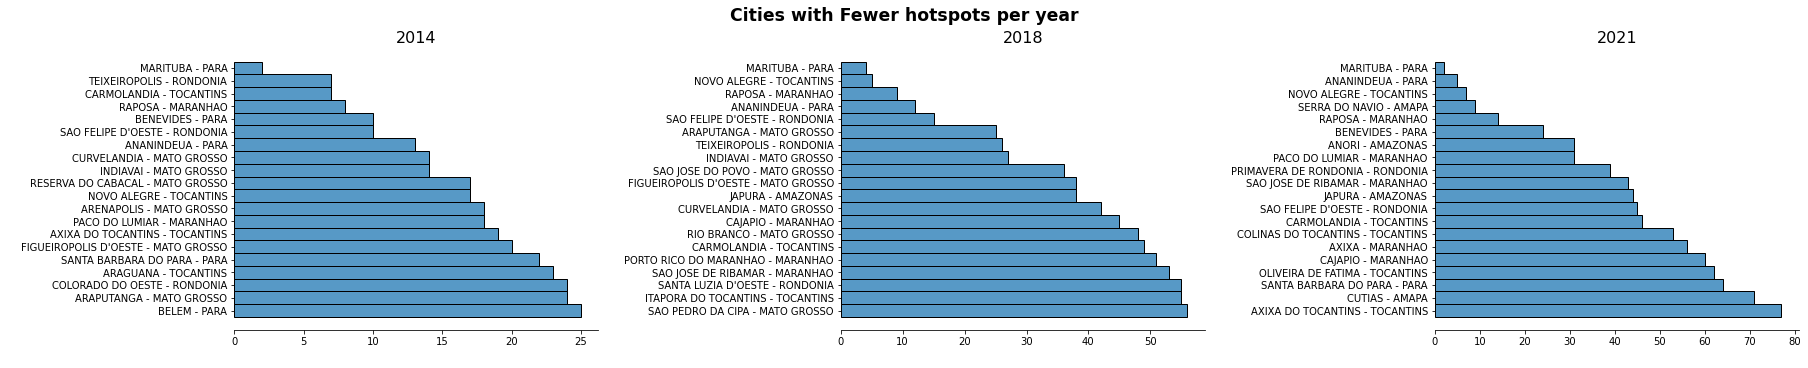

In [5]:
plot_top_hotspot(dataset, how_many=20, ascending=True)

#### List of maijors hotspot cities

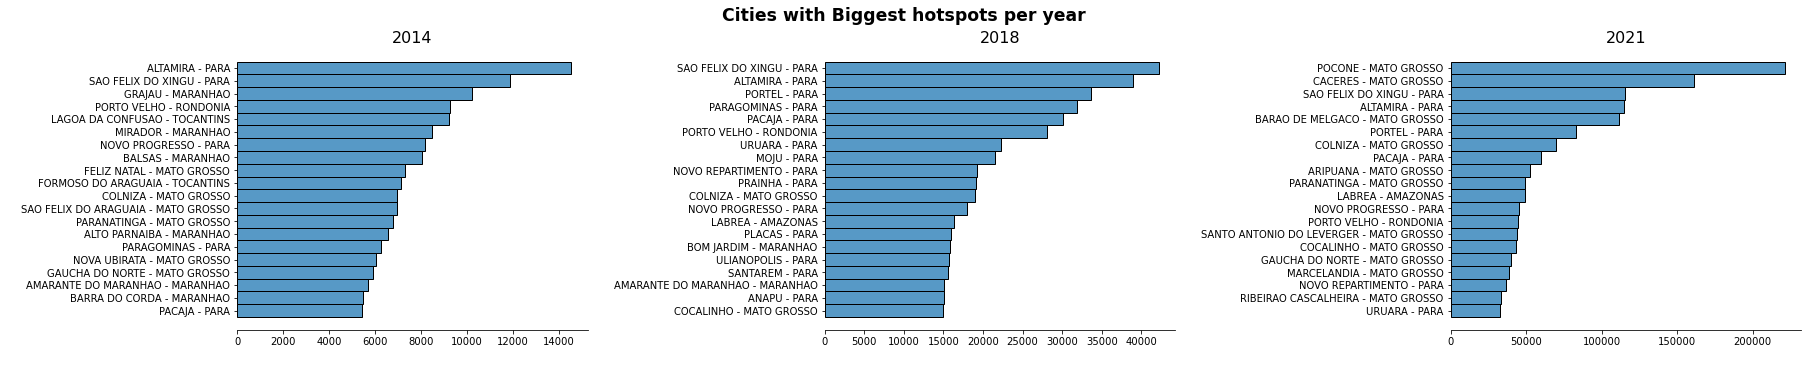

In [6]:
plot_top_hotspot(dataset, how_many=20, ascending=False)

### Get top Amazon IPS cities

In [7]:
def get_top_spi(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['IPS Amazônia'].sum().sort_values(ascending=ascending)[:head]


def get_max_spi(dataset, year):
    max_spi = dataset[(dataset["ano"] == year)]["IPS Amazônia"].max()
    return dataset[(dataset["ano"] == year) & (dataset["IPS Amazônia"] == max_spi)]


def get_min_spi(dataset, year):
    min_spi = dataset[(dataset["ano"] == year)]["IPS Amazônia"].min()
    return dataset[(dataset["ano"] == year) & (dataset["IPS Amazônia"] == min_spi)]


def plot_top_spi(dataset, how_many=10, ascending=True):
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)

    title = "Cities with {} Amazon SPI per year".format("Fewer" if ascending else "Biggest")
    fig.suptitle(title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[(dataset["ano"] == year)]
        tt = get_top_spi(yeardf, head=how_many, ascending=ascending)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        
        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)
            
        sns.histplot(data=tt, y=tt.index, weights=tt.values, ax=ax)

#### List of minors SPImazon spi cities

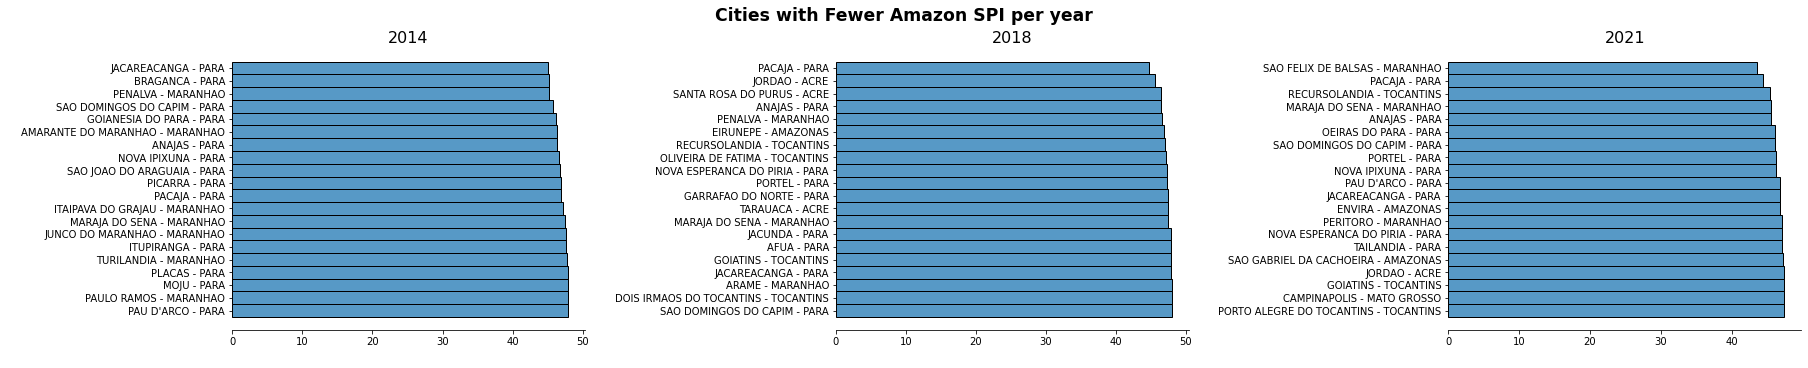

In [8]:
plot_top_spi(dataset, how_many=20, ascending=True)

#### List of maijors SPImazon spi cities

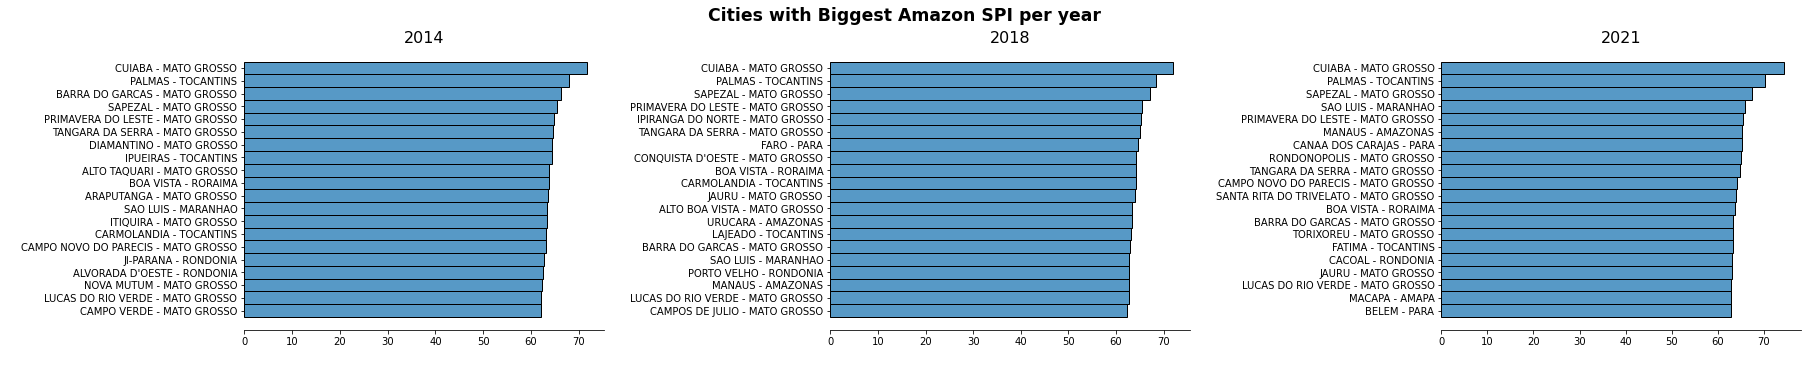

In [9]:
plot_top_spi(dataset, how_many=20, ascending=False)

In [18]:
# Lista os municípios abaixo da média ips e que foram os que mais queimaram
year = 2021
mean =  dataset["Media IPS"]

low_spi_mean = dataset[(dataset["IPS Amazônia"] > mean) & (dataset["ano"] == year)]
low_spi_mean.sort_values(by=["fococalor"], ascending=[False])

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,riscofogocat,IPS Amazônia,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
1918,2021,MATO GROSSO,POCONE,11.6,1.32,0.69,8.98,221068,MODERADO,56.01,...,20.36,1.18,39.92,0.00,1.0,31.46,12.41,2.0,21.71,16.47
1844,2021,MATO GROSSO,CACERES,11.5,1.41,0.70,9.24,160897,MODERADO,62.56,...,19.84,0.73,73.24,2.71,3.0,98.98,118.38,3.0,43.40,25.37
1839,2021,MATO GROSSO,BARAO DE MELGACO,32.2,0.57,0.88,12.18,111198,ALTO,56.63,...,26.09,33.64,43.48,0.00,1.0,0.00,0.00,1.0,10.28,5.00
1857,2021,MATO GROSSO,COLNIZA,14.1,1.47,0.66,8.37,69858,MODERADO,55.75,...,20.34,20.95,19.61,0.00,1.0,24.29,16.01,2.0,15.32,10.06
1914,2021,MATO GROSSO,PARANATINGA,44.6,0.59,0.81,11.01,49328,ALTO,57.83,...,20.98,1.93,28.34,0.00,1.0,96.31,42.55,3.0,17.37,10.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,2021,PARA,BENEVIDES,2.6,2.86,0.09,3.09,24,MUITO_BAIXO,61.81,...,23.02,27.18,55.36,0.00,1.0,4.26,0.00,1.0,19.86,11.62
1579,2021,AMAPA,SERRA DO NAVIO,2.2,4.32,0.10,6.48,9,MUITO_BAIXO,60.45,...,16.30,101.91,61.96,0.00,1.0,26.11,0.00,1.0,5.00,5.00
2262,2021,TOCANTINS,NOVO ALEGRE,4.1,1.10,0.59,8.99,7,MODERADO,55.18,...,14.29,5.23,57.14,0.00,1.0,147.13,133.08,3.0,9.43,7.72
1975,2021,PARA,ANANINDEUA,2.4,3.86,0.06,7.92,5,MUITO_BAIXO,55.58,...,15.63,2.41,60.04,1.14,2.0,56.02,177.22,4.0,19.63,12.06


In [11]:
year = 2021

low_of_spi_mean = dataset[(dataset["IPS Amazônia"] < dataset["Media IPS"]) & (dataset["ano"] == year)]
low_of_spi_mean.sort_values(by="fococalor", ascending=False)

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,riscofogocat,IPS Amazônia,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
2085,2021,PARA,SAO FELIX DO XINGU,17.6,1.22,0.73,8.56,115684,ALTO,52.94,...,27.81,6.39,19.07,0.00,1.0,0.58,0.00,1.0,6.87,5.00
1973,2021,PARA,ALTAMIRA,17.0,0.72,0.75,8.89,114663,ALTO,52.95,...,21.21,11.35,18.94,2.72,3.0,632.00,500.00,5.0,16.19,9.98
2061,2021,PARA,PORTEL,3.4,1.60,0.38,6.32,83199,BAIXO,46.25,...,29.83,285.67,17.78,0.00,1.0,1.10,1.37,2.0,16.92,10.49
2052,2021,PARA,PACAJA,3.8,1.71,0.44,7.72,59874,BAIXO,44.34,...,26.29,1.48,17.40,41.67,5.0,39.04,26.43,2.0,8.01,5.32
1838,2021,MATO GROSSO,ARIPUANA,17.2,1.00,0.70,9.18,52393,MODERADO,53.19,...,24.52,10.06,41.05,6.68,3.0,211.66,94.91,3.0,27.74,17.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2021,TOCANTINS,AXIXA DO TOCANTINS,8.0,1.20,0.59,2.26,77,MODERADO,53.97,...,21.08,44.48,67.57,0.00,1.0,13.61,25.50,2.0,25.63,18.04
2264,2021,TOCANTINS,OLIVEIRA DE FATIMA,5.7,1.02,0.53,4.72,62,MODERADO,52.59,...,14.29,0.00,28.57,0.00,1.0,64.35,0.00,1.0,37.77,35.97
1677,2021,MARANHAO,CAJAPIO,4.4,0.38,0.55,5.58,60,MODERADO,52.24,...,29.41,69.95,43.79,0.00,1.0,11.96,0.00,1.0,10.56,6.89
1613,2021,AMAZONAS,JAPURA,1.0,2.37,0.02,4.07,44,MUITO_BAIXO,50.12,...,28.93,65.66,60.33,0.25,2.0,122.13,148.87,4.0,5.00,5.00


In [12]:
 dataset[dataset["municipio"] == "TEIXEIROPOLIS"]

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,riscofogocat,IPS Amazônia,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
612,2014,RONDONIA,TEIXEIROPOLIS,0.0,1.51,0.14,0.00,7,MUITO_BAIXO,54.94,...,24.64,165.92,8.70,0.0,1.0,44.03,0.0,1.0,22.81,17.26
1384,2018,RONDONIA,TEIXEIROPOLIS,3.9,2.03,0.69,0.05,26,MODERADO,53.21,...,15.52,22.02,17.24,0.0,1.0,14.68,0.0,1.0,21.29,16.22
2156,2021,RONDONIA,TEIXEIROPOLIS,44.4,0.20,0.97,4.22,175,MUITO_ALTO,56.86,...,15.62,2.15,12.50,0.0,1.0,0.00,0.0,1.0,28.32,22.05


### Visualize the correlation in a matrix

In [13]:
# def show_heatmap_corr(dataset):
#     fig, ax = plt.subplots(figsize=(50,50))
#     sns.heatmap(
#         dataset.corr(), 
#         vmax=1.0, 
#         center=0, 
#         fmt='.2f',
#         square=True, 
#         linewidths=.5, 
#         annot=True, 
#         cbar_kws={"shrink": .70}
#     )
    
# show_heatmap_corr(low_of_spi_mean)

In [14]:
# sns.set_theme(style="ticks")
# sns.pairplot(low_of_spi_mean)

In [15]:
# def plot_indicators(dataset, indicators, labels):
#     for idx, ind in enumerate(indicators):       
#         plt.scatter(dataset.ano, ind, label=labels[idx], s=100, ec="white", zorder=2)
#         plt.plot(dataset.ano, ind)
#         plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
        
#     plt.show()

In [16]:
# citie_name = "NOVA IPIXUNA"
# citie_data = dataset[dataset.municipio == citie_name]

In [17]:
# compare hotspot and Amazon IPS
# labels = [ "frp", "riscofogo", "IPS Amazônia"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]]]
# plot_indicators(citie_data, indicators, labels)

# # Show Dimensions
# labels = ["Necessidades Humanas Básicas", "Fundamentos para o Bem-Estar", "Oportunidades"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]]]
# plot_indicators(citie_data, indicators, labels)
# plt.show()

# # Show Necessidades Humanas Básicas components
# labels = ["Nutrição e cuidados médicos básicos", "Água e saneamento", "Moradia", "Segurança pessoal"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]], citie_data[labels[3]]]
# plot_indicators(citie_data, indicators, labels)

# # Show Fundamentos para o Bem-Estar components
# labels = ["Acesso ao conhecimento básico", "Acesso à informação e comunicação", "Saúde e bem-estar", "Qualidade do meio ambiente"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]], citie_data[labels[3]]]
# plot_indicators(citie_data, indicators, labels)

# # Show Oportunidades components
# labels = labels = ["Direitos individuais", "Liberdade individual e de escolha", "Tolerância e inclusão", "Acesso à educação superior"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]], citie_data[labels[3]]]
# plot_indicators(citie_data, indicators, labels)